In [1]:
import pandas as pd
import json
from scipy.stats import circmean

In [29]:
data = [{'RTC': '2023-11-28T18:10:53.146020', 'WSPD': 0.0, 'WDIR': 0.0, 'ATMP': 25.543, 'HUMD': 70.59, 'RAIN': 0.0, 'SRAD': 0.061, 'BPRS': 1080.832, 'WDCH': 28.995, 'DWPT': 19.801, 'P12': 21.25, 'P13': -0.116, 'P14': 0.0, 'P15': 0.0, 'P16': 0.0}, {'RTC': '2023-11-28T18:10:54.147513', 'WSPD': 0.0, 'WDIR': 0.0, 'ATMP': 25.546, 'HUMD': 70.591, 'RAIN': 0.0, 'SRAD': 0.06, 'BPRS': 1080.949, 'WDCH': 28.997, 'DWPT': 19.804, 'P12': 21.256, 'P13': -0.115, 'P14': 0.0, 'P15': 0.0, 'P16': 0.0}, {'RTC': '2023-11-28T18:10:55.148949', 'WSPD': 0.0, 'WDIR': 0.0, 'ATMP': 25.55, 'HUMD': 70.592, 'RAIN': 0.0, 'SRAD': 0.06, 'BPRS': 1081.064, 'WDCH': 28.999, 'DWPT': 19.808, 'P12': 21.256, 'P13': -0.115, 'P14': 0.0, 'P15': 0.0, 'P16': 0.0}, {'RTC': '2023-11-28T18:10:56.150446', 'WSPD': 0.0, 'WDIR': 0.0, 'ATMP': 25.553, 'HUMD': 70.592, 'RAIN': 0.0, 'SRAD': 0.06, 'BPRS': 1081.179, 'WDCH': 29.001, 'DWPT': 19.811, 'P12': 21.261, 'P13': -0.115, 'P14': 0.0, 'P15': 0.0, 'P16': 0.0}, {'RTC': '2023-11-28T18:10:57.152196', 'WSPD': 0.0, 'WDIR': 0.0, 'ATMP': 25.557, 'HUMD': 70.593, 'RAIN': 0.0, 'SRAD': 0.059, 'BPRS': 1081.293, 'WDCH': 29.004, 'DWPT': 19.815, 'P12': 21.261, 'P13': -0.115, 'P14': 0.0, 'P15': 0.0, 'P16': 0.0}]
dict_to_store = {"RTC":None,"WSPD":None,"WDIR":None,"ATMP":None,"HUMD":None,"RAIN":None,"SRAD":None,"BPRS":None,"WDCH":None,"DWPT":None,"P12":None,"P13":None,"P14":None,"P15":None,"P16":None}

In [30]:
df = pd.DataFrame(data).apply(pd.to_numeric,errors='coerce', downcast='float').round(3)

In [33]:
dict_to_store['RTC'] = data[-1]['RTC']
dict_to_store["WSPD"] = df['WSPD'].mean()
dict_to_store["WDIR"] = round(circmean(df['WDIR'], high=360, low=0),3)
dict_to_store["ATMP"] = df['ATMP'].mean()
dict_to_store["RAIN"] = df['RAIN'].sum()
dict_to_store["SRAD"] = df['SRAD'].mean()
dict_to_store["BPRS"] = df['BPRS'].mean()
dict_to_store["WDCH"] = df['WDCH'].mean()
dict_to_store["DWPT"] = df['DWPT'].mean()
dict_to_store["P12"] = df['P12'].mean()
dict_to_store["P13"] = df['P13'].mean()
dict_to_store["P14"] = df['P14'].mean()
dict_to_store["P15"] = df['P15'].mean()
dict_to_store["P16"] = df['P16'].mean()
print(dict_to_store)

{'RTC': '2023-11-28T18:10:57.152196', 'WSPD': 0.0, 'WDIR': 0.0, 'ATMP': 25.549799, 'HUMD': None, 'RAIN': 0.0, 'SRAD': 0.060000002, 'BPRS': 1081.0634, 'WDCH': 28.9992, 'DWPT': 19.8078, 'P12': 21.256802, 'P13': -0.115200005, 'P14': 0.0, 'P15': 0.0, 'P16': 0.0}


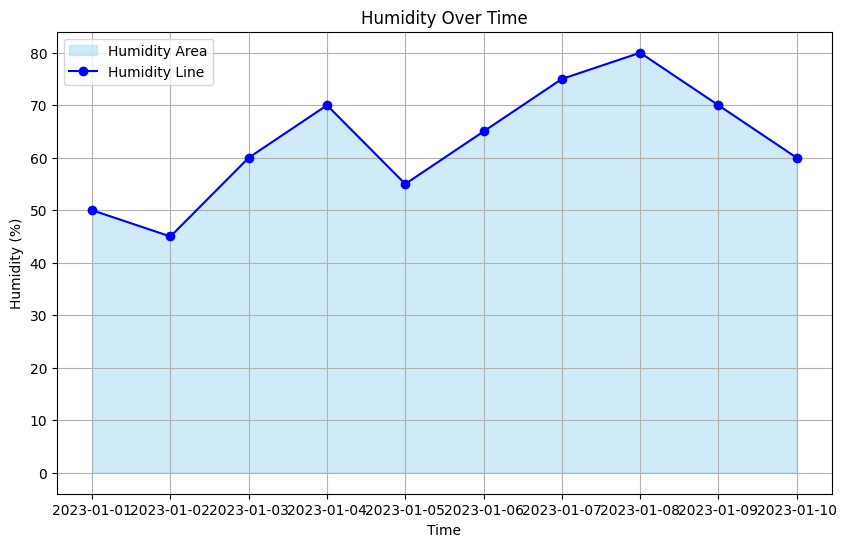

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataset (replace this with your actual dataset)
data = {
    'Time': pd.date_range(start='2023-01-01', end='2023-01-10', freq='D'),
    'Humidity': [50, 45, 60, 70, 55, 65, 75, 80, 70, 60],
}

df = pd.DataFrame(data)
df.set_index('Time', inplace=True)

# Plotting an area chart for humidity
plt.figure(figsize=(10, 6))
plt.fill_between(df.index, df['Humidity'], color='skyblue', alpha=0.4, label='Humidity Area')
plt.plot(df.index, df['Humidity'], color='blue', label='Humidity Line', marker='o')

# Customize the plot
plt.title('Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.show()